# **Heart Failure Prediction Dataset Assignment** **200 marks**:

---













>  **Important Note:**  
> All code in this assignment must be **clean, readable, and well-formatted**. This includes:
>
> -  Clear and meaningful variable names  
> -  Consistent indentation and spacing  
> -  Proper use of comments to explain logic  
> -  Organized code blocks in separate cells  
> -  Avoidance of redundant or repeated code  
>
>  Submissions with poorly written or unreadable code may result in **mark deductions**, even if the logic is correct.


## ** About Dataset**

##**Context**
Cardiovascular diseases (CVDs) are the number 1 cause of death globally, taking an estimated 17.9 million lives each year, which accounts for 31% of all deaths worldwide. Four out of 5CVD deaths are due to heart attacks and strokes, and one-third of these deaths occur prematurely in people under 70 years of age. Heart failure is a common event caused by CVDs and this dataset contains 11 features that can be used to predict a possible heart disease.

People with cardiovascular disease or who are at high cardiovascular risk (due to the presence of one or more risk factors such as hypertension, diabetes, hyperlipidaemia or already established disease) need early detection and management wherein a machine learning model can be of great help.

##**Attribute Information**
* Age: age of the patient [years]
* Sex: sex of the patient [M: Male, F: Female]
* ChestPainType: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]
* RestingBP: resting blood pressure [mm Hg]
* Cholesterol: serum cholesterol [mm/dl]
* FastingBS: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]
* RestingECG: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]
* MaxHR: maximum heart rate achieved [Numeric value between 60 and 202]
* ExerciseAngina: exercise-induced angina [Y: Yes, N: No]
* Oldpeak: oldpeak = ST [Numeric value measured in depression]
* ST_Slope: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]
* HeartDisease: output class [1: heart disease, 0: Normal]

## **Objective:**

The objective of this assignment is to analyze a dataset related to heart disease prediction and build predictive models that can classify whether a patient is likely to have heart disease or not based on clinical and demographic attributes

### **1. Load the Data** — *[5 Marks]*
- Load dataset using pandas
- Display first few rows

---


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv('heart.csv')
df.head(5)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


### **2. Data Inspection** — *[10 Marks]*
- Shape of data
- Info (data types, nulls)
- Value counts for each column

---


In [ ]:
df.shape

(918, 12)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [ ]:
df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [ ]:
categorical = ['Sex','ChestPainType','RestingECG','ExerciseAngina','ST_Slope']
numerical = ['Age','RestingBP','Cholesterol','FastingBS','MaxHR','Oldpeak']
target= ['HeartDisease']

In [ ]:
# Value counts for each categorical column
for col in categorical :
  print(f"\nValue counts for {col}:")
  print(df[col].value_counts())


Value counts for Sex:
Sex
M    725
F    193
Name: count, dtype: int64

Value counts for ChestPainType:
ChestPainType
ASY    496
NAP    203
ATA    173
TA      46
Name: count, dtype: int64

Value counts for RestingECG:
RestingECG
Normal    552
LVH       188
ST        178
Name: count, dtype: int64

Value counts for ExerciseAngina:
ExerciseAngina
N    547
Y    371
Name: count, dtype: int64

Value counts for ST_Slope:
ST_Slope
Flat    460
Up      395
Down     63
Name: count, dtype: int64


In [ ]:
# Value counts for each numerical column
for col in numerical :
  print(f"\nValue counts for {col}:")
  print(df[col].value_counts())


Value counts for Age:
Age
54    51
58    42
55    41
56    38
57    38
52    36
62    35
59    35
51    35
53    33
60    32
48    31
61    31
63    30
50    25
41    24
43    24
46    24
64    22
49    21
65    21
47    19
44    19
45    18
42    18
38    16
67    15
39    15
40    13
69    13
66    13
37    11
35    11
68    10
74     7
70     7
34     7
36     6
32     5
71     5
72     4
75     3
29     3
31     2
33     2
77     2
76     2
30     1
28     1
73     1
Name: count, dtype: int64

Value counts for RestingBP:
RestingBP
120    132
130    118
140    107
110     58
150     55
      ... 
101      1
117      1
192      1
129      1
164      1
Name: count, Length: 67, dtype: int64

Value counts for Cholesterol:
Cholesterol
0      172
254     11
220     10
223     10
204      9
      ... 
353      1
278      1
157      1
176      1
131      1
Name: count, Length: 222, dtype: int64

Value counts for FastingBS:
FastingBS
0    704
1    214
Name: count, dtype: int64

Value counts

In [ ]:
# Value counts for target column
for col in target :
  print(f"\nValue counts for {col}:")
  print(df[col].value_counts())


Value counts for HeartDisease:
HeartDisease
1    508
0    410
Name: count, dtype: int64


### **3. Data Cleaning** — *[15 Marks]*
- Handle missing values (if any)
- Encode categorical variables
- Convert data types if required

---


In [ ]:
df.dtypes

,0
Age,int64
Sex,object
ChestPainType,object
RestingBP,int64
Cholesterol,int64
FastingBS,int64
RestingECG,object
MaxHR,int64
ExerciseAngina,object
Oldpeak,float64


In [ ]:
print(df.isnull().sum())

Age                  0
RestingBP            0
Cholesterol          0
FastingBS            0
MaxHR                0
Oldpeak              0
HeartDisease         0
Sex_M                0
ChestPainType_ATA    0
ChestPainType_NAP    0
ChestPainType_TA     0
RestingECG_Normal    0
RestingECG_ST        0
ExerciseAngina_Y     0
ST_Slope_Flat        0
ST_Slope_Up          0
dtype: int64


#No missing values are observed

In [ ]:

# Identify categorical columns automatically
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

# Check which columns are left
print(f"Categorical columns detected: {categorical_cols}")

# Identify categorical columns automatically
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

# Check which columns are left
print(f"Categorical columns detected: {categorical_cols}")

# Safely encode all categorical columns using one-hot encoding
if categorical_cols:  # If there are any categorical columns
    df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)  # drop_first=True avoids multicollinearity
else:
    print("No categorical columns found to encode.")

Categorical columns detected: []
Categorical columns detected: []
No categorical columns found to encode.


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                918 non-null    float64
 1   RestingBP          918 non-null    float64
 2   Cholesterol        918 non-null    float64
 3   FastingBS          918 non-null    int64  
 4   MaxHR              918 non-null    float64
 5   Oldpeak            918 non-null    float64
 6   HeartDisease       918 non-null    int64  
 7   Sex_M              918 non-null    bool   
 8   ChestPainType_ATA  918 non-null    bool   
 9   ChestPainType_NAP  918 non-null    bool   
 10  ChestPainType_TA   918 non-null    bool   
 11  RestingECG_Normal  918 non-null    bool   
 12  RestingECG_ST      918 non-null    bool   
 13  ExerciseAngina_Y   918 non-null    bool   
 14  ST_Slope_Flat      918 non-null    bool   
 15  ST_Slope_Up        918 non-null    bool   
dtypes: bool(9), float64(5), in

In [ ]:
df.columns

Index(['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak',
       'HeartDisease', 'Sex_M', 'ChestPainType_ATA', 'ChestPainType_NAP',
       'ChestPainType_TA', 'RestingECG_Normal', 'RestingECG_ST',
       'ExerciseAngina_Y', 'ST_Slope_Flat', 'ST_Slope_Up'],
      dtype='object')

In [ ]:
df.dtypes

,0
Age,int64
RestingBP,int64
Cholesterol,int64
FastingBS,int64
MaxHR,int64
Oldpeak,float64
HeartDisease,int64
Sex_M,bool
ChestPainType_ATA,bool
ChestPainType_NAP,bool



### **4. Outlier Detection & Treatment** — *[10 Marks]*

<Axes: >

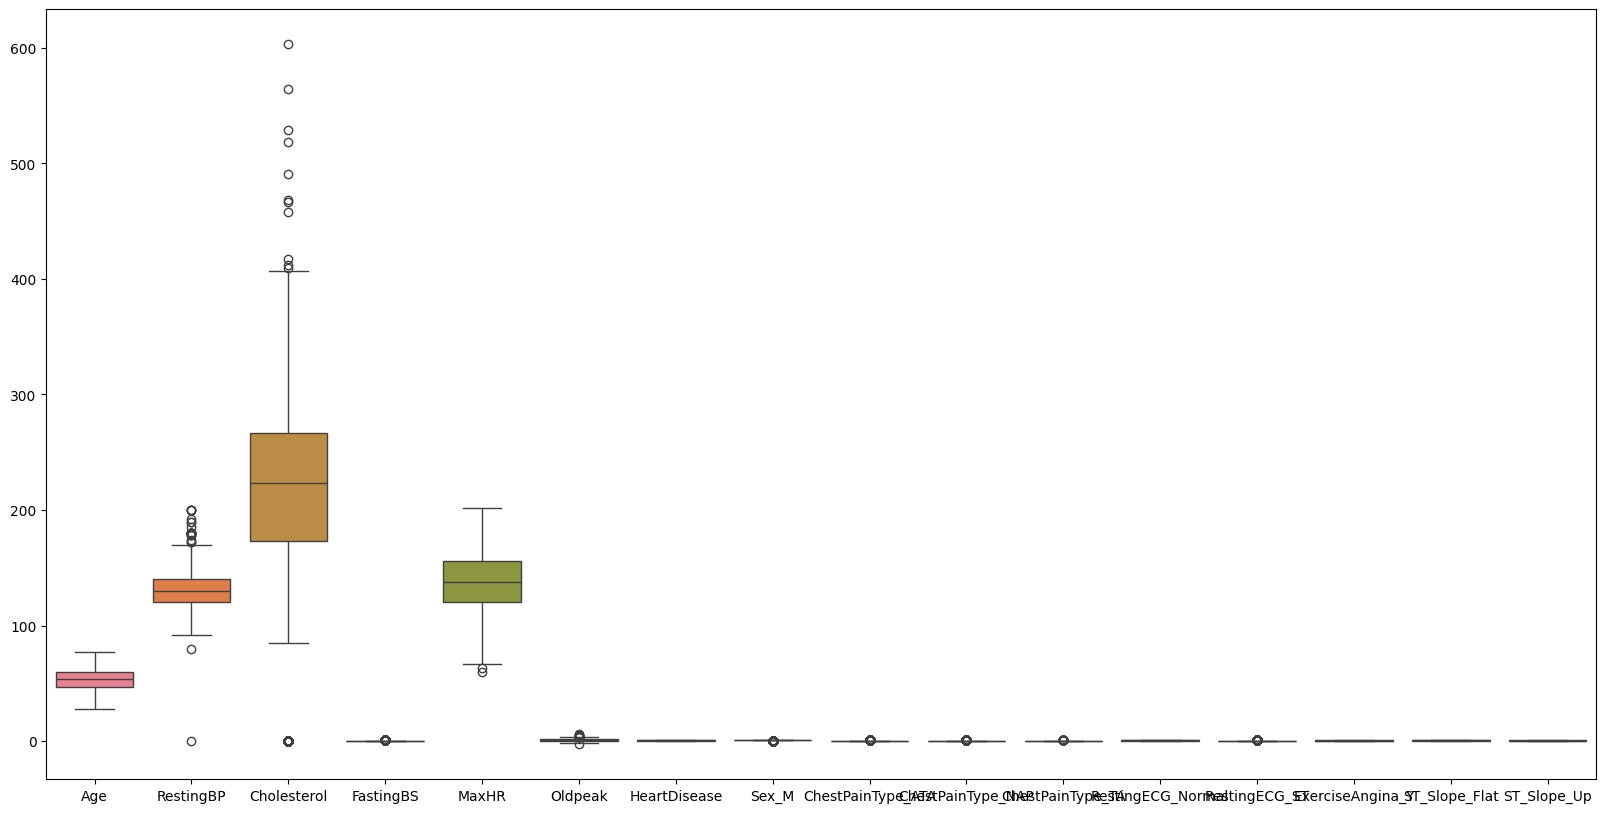

In [ ]:

numerical_features = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']
plt.figure(figsize=(20,10))
sns.boxplot(data=df)


Numerical feature values after outlier treatment:



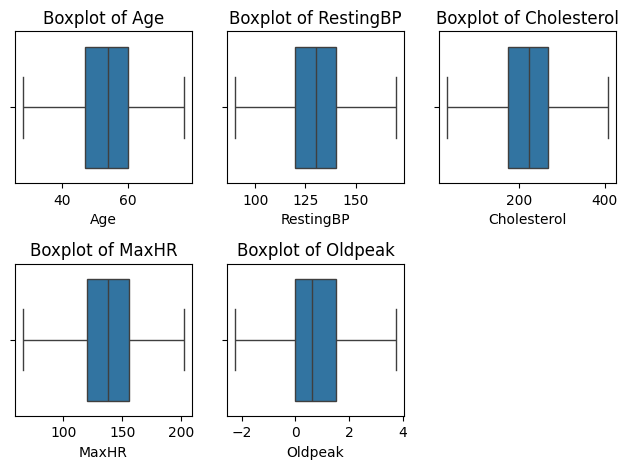

In [ ]:
for feature in numerical_features:
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[feature] = np.where(df[feature] < lower_bound, lower_bound, df[feature])
    df[feature] = np.where(df[feature] > upper_bound, upper_bound, df[feature])
print("\nNumerical feature values after outlier treatment:\n")
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x=df[feature])
    plt.title(f'Boxplot of {feature}')

plt.tight_layout()
plt.show()

In [ ]:
df.shape

(918, 16)

### **5. Data Description** — *[10 Marks]*
- Describe numerical features (mean, std, min, max)
- Unique values for categorical variables

---


In [ ]:
df.describe ()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.125272,203.985158,0.233115,136.819172,0.877778,0.553377
std,9.432617,16.993314,95.922341,0.423046,25.432057,1.031693,0.497414
min,28.000000,90.000000,32.625000,0.000000,66.000000,-2.250000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,170.000000,407.625000,1.000000,202.000000,3.750000,1.000000


In [ ]:

categorical_cols = [col for col in df.columns if col.startswith('ExerciseAngina')] + \
                   [col for col in df.columns if col.startswith('Sex')] + \
                   [col for col in df.columns if col.startswith('ChestPain')] + \
                   [col for col in df.columns if col.startswith('RestingECG')] + \
                   [col for col in df.columns if col.startswith('ST_Slope')]
print("\nUnique values for categorical columns:\n")
for col in categorical_cols:
    unique_values = df[col].unique()
    print(f"{col}: {unique_values}")



Unique values for categorical columns:

ExerciseAngina_Y: [False  True]
Sex_M: [ True False]
ChestPainType_ATA: [ True False]
ChestPainType_NAP: [False  True]
ChestPainType_TA: [False  True]
RestingECG_Normal: [ True False]
RestingECG_ST: [False  True]
ST_Slope_Flat: [False  True]
ST_Slope_Up: [ True False]



### **6. Univariate Analysis** — *[20 Marks]*
Analyze **each column individually**, one by one. No common loop functions allowed. Include:
- Histograms for numerical variables
- Bar plots for categorical
- Comments on distributions

---


<Axes: xlabel='Age', ylabel='Count'>

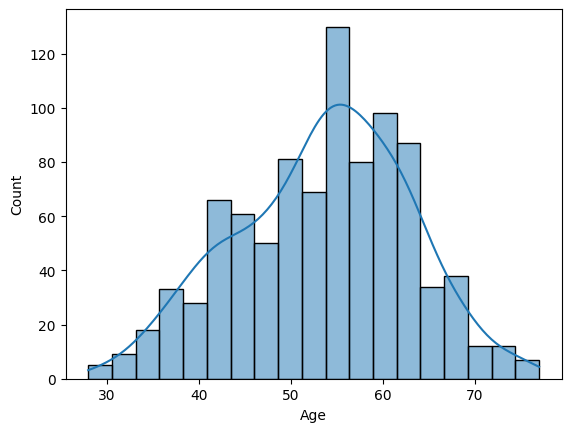

In [ ]:
sns.histplot(data=df,x='Age',kde=True)

In [ ]:
df['Age'].describe()

,Age
count,918.000000
mean,53.510893
std,9.432617
min,28.000000
25%,47.000000
50%,54.000000
75%,60.000000
max,77.000000


In [ ]:
#Observations
# Most of the data lie between 47 and 60
# Mean is 53.5 and standard deviation is 9.4, median 54

<Axes: xlabel='RestingBP', ylabel='Count'>

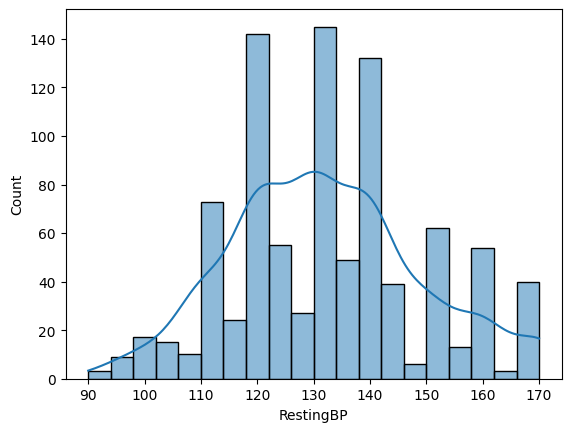

In [ ]:
sns.histplot(data=df,x='RestingBP',kde=True)

In [ ]:
df['RestingBP'].describe()

,RestingBP
count,918.000000
mean,132.125272
std,16.993314
min,90.000000
25%,120.000000
50%,130.000000
75%,140.000000
max,170.000000


In [ ]:
#Observations
# Data fluctuates between 120 and 140
# Mean resting bp is observed to be 132.12
# Median resting bp is 130

<Axes: xlabel='Cholesterol', ylabel='Count'>

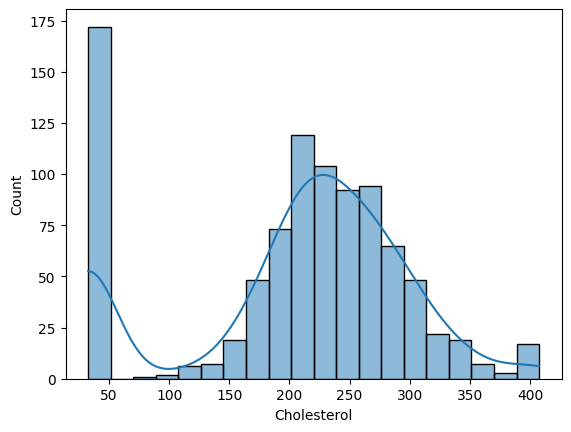

In [ ]:
sns.histplot(data=df,x='Cholesterol',kde=True)

In [ ]:
df['Cholesterol'].describe()

,Cholesterol
count,918.000000
mean,203.985158
std,95.922341
min,32.625000
25%,173.250000
50%,223.000000
75%,267.000000
max,407.625000


In [ ]:
#Observations
# Maximum cholesterol is measured to be 407
# Data lie between 173 and 267
# mean cholestrol is 203.9 and median 223

<Axes: xlabel='MaxHR', ylabel='Count'>

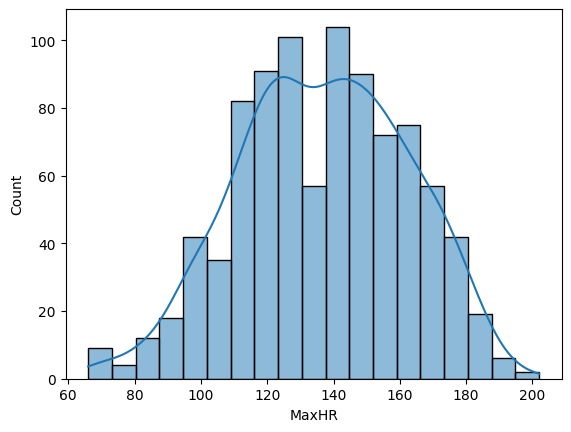

In [ ]:
sns.histplot(data=df,x='MaxHR',kde=True)

In [ ]:
df['MaxHR'].describe()

,MaxHR
count,918.000000
mean,136.819172
std,25.432057
min,66.000000
25%,120.000000
50%,138.000000
75%,156.000000
max,202.000000


In [ ]:
#Observations
# Most heart rate is between 120 to 156
# Mean is 66 , median is 138, standard deviation is 25.4
# max heart rate is observed to be 202

<Axes: xlabel='Oldpeak', ylabel='Count'>

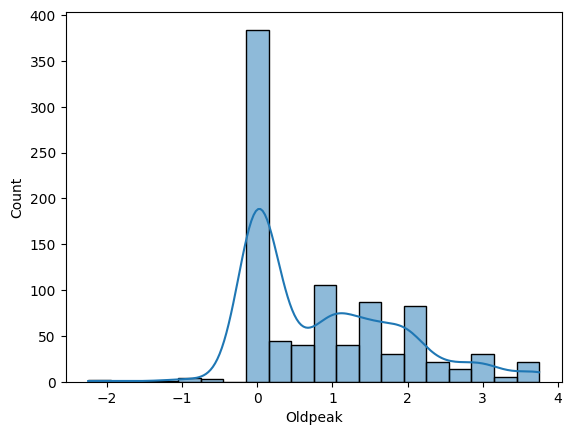

In [ ]:
sns.histplot(data=df,x='Oldpeak',kde=True)

In [ ]:
df['Oldpeak'].describe()

,Oldpeak
count,918.000000
mean,0.877778
std,1.031693
min,-2.250000
25%,0.000000
50%,0.600000
75%,1.500000
max,3.750000


In [ ]:
#Observation
# Mean is 0.8, median is 0.6, standard deviation is 1.03
# max old peak is 3.75 but most data lies between 0 to 1.5

<Axes: xlabel='FastingBS', ylabel='Count'>

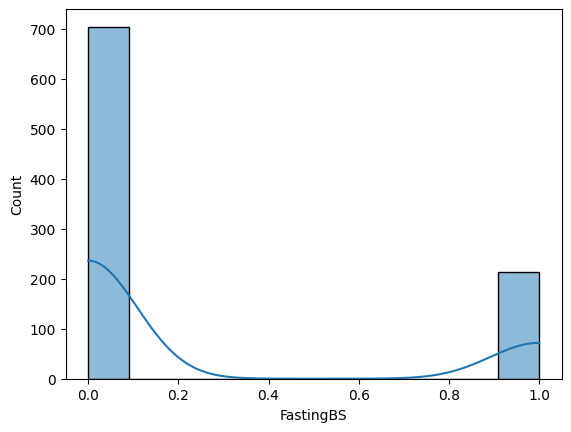

In [ ]:
sns.histplot(data=df,x='FastingBS',kde=True)

In [ ]:
df['FastingBS'].value_counts()

,count
FastingBS,
0,704
1,214


In [ ]:
#Observation
# most data lies in zero with 704
# little data of 214 is observed at one

<Axes: xlabel='Sex_M', ylabel='count'>

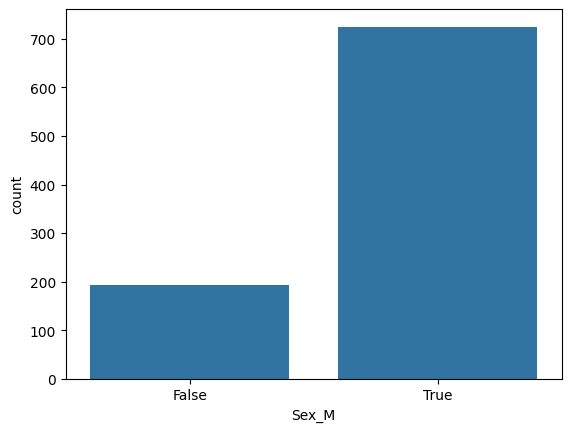

In [ ]:
sns.countplot(data=df,x='Sex_M')

In [ ]:
#Observations
#Male is suffering high with heart disease
#Female is less suffered than male

<Axes: xlabel='ExerciseAngina_Y', ylabel='count'>

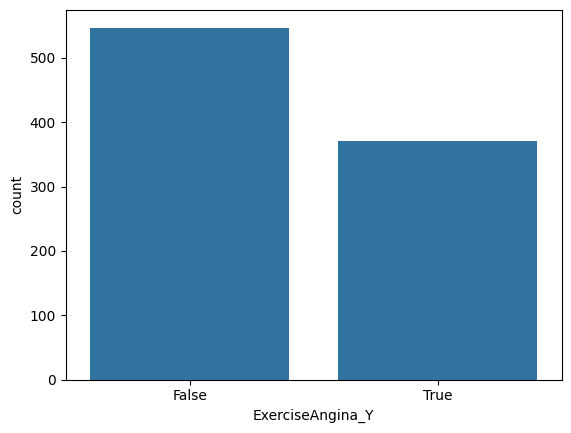

In [ ]:
sns.countplot(data=df,x='ExerciseAngina_Y')

In [ ]:
#Observations
# females are doing more exercise than mmales

<Axes: xlabel='ChestPainType_ATA', ylabel='count'>

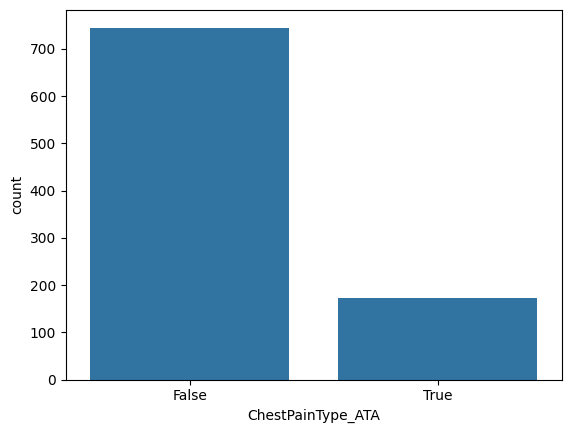

In [ ]:
sns.countplot(data=df,x='ChestPainType_ATA')

In [ ]:
#Observation
# In most cases chest pain is not observed before heart disease

<Axes: xlabel='RestingECG_Normal', ylabel='count'>

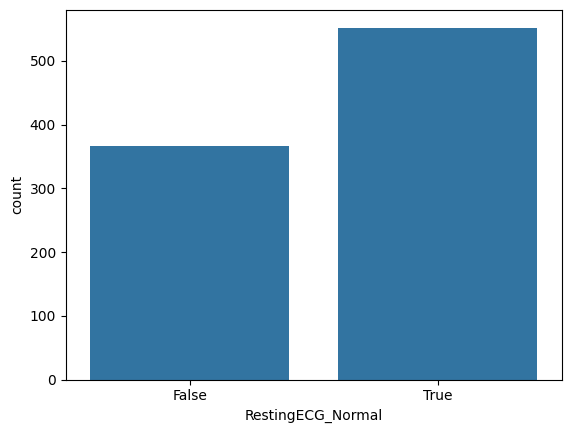

In [ ]:
sns.countplot(data=df,x='RestingECG_Normal')

In [ ]:
 # Observations
 # Resting ECG Normal is more in males than females

<Axes: xlabel='RestingECG_ST', ylabel='count'>

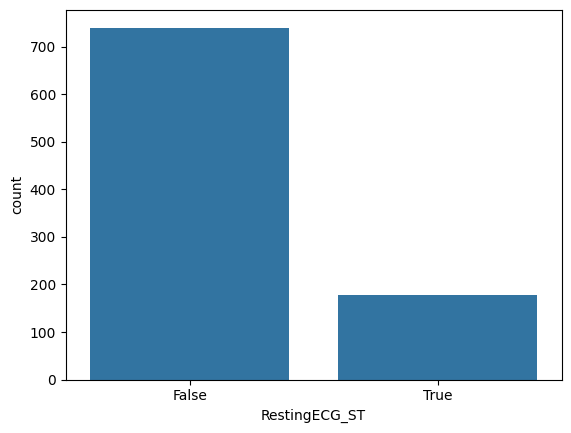

In [ ]:
sns.countplot(data=df,x='RestingECG_ST')

In [ ]:
#Observations
# Resting ECG ST is high is females than in males

<Axes: xlabel='ST_Slope_Flat', ylabel='count'>

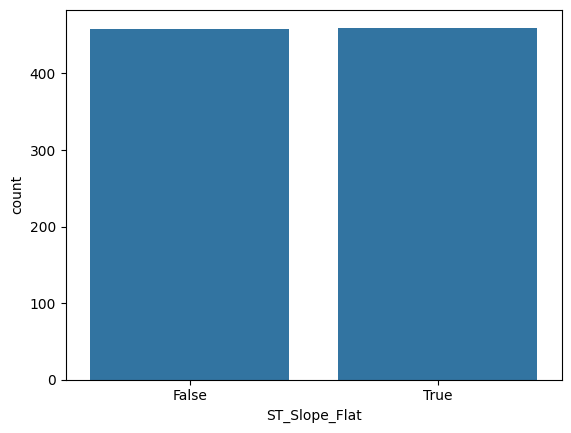

In [ ]:
sns.countplot(data=df,x='ST_Slope_Flat')

In [ ]:
#Observations
# ST slope is high in males than females

<Axes: xlabel='ST_Slope_Up', ylabel='count'>

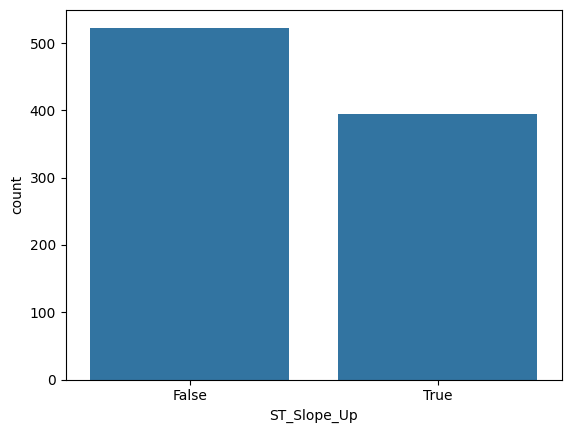

In [ ]:
sns.countplot(data=df,x='ST_Slope_Up')

In [ ]:
#Observations
#ST slope is high in females than in male

<Axes: xlabel='HeartDisease', ylabel='count'>

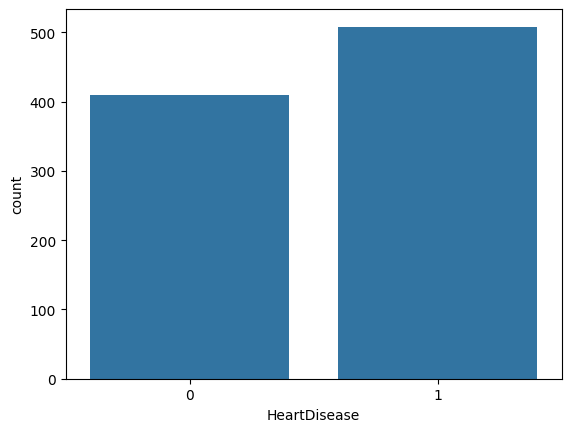

In [ ]:
sns.countplot(data=df,x='HeartDisease')

In [ ]:
#Observations
# It is clearly observed that people with heart disease are more than normal people

### **7. Bivariate Analysis** — *[20 Marks]*
Analyze the relationship of **each independent variable** with the target variable `HeartDisease`.
- Box plots, violin plots, groupby means
- Separate plots/analysis for each column

---


<Axes: xlabel='HeartDisease', ylabel='Age'>

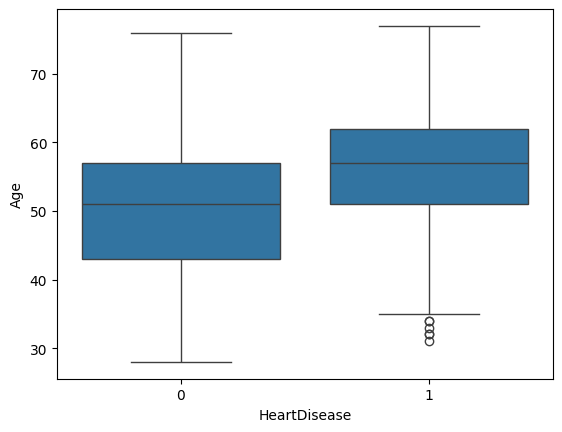

In [ ]:
sns.boxplot(data=df,x='HeartDisease',y='Age')

In [ ]:
#Observations
#People with 50 and more than 50 years are suffering more with heat diseases

<Axes: xlabel='Sex_M', ylabel='count'>

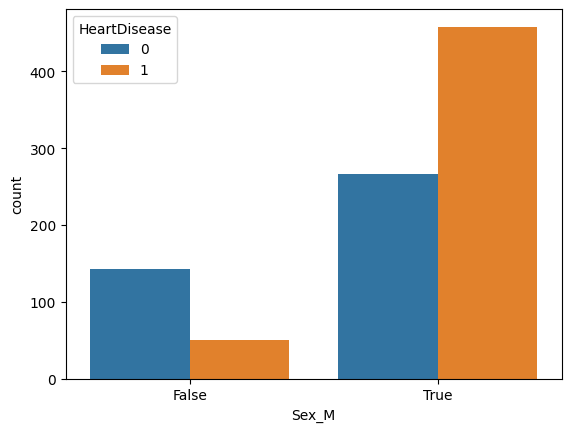

In [ ]:
sns.countplot(data=df,x='Sex_M',hue='HeartDisease')

In [ ]:
#Observations
# female are less effected by heart diseases than male

<Axes: xlabel='ChestPainType_NAP', ylabel='count'>

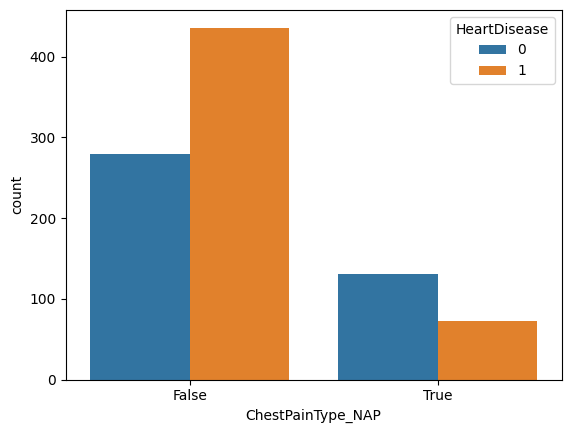

In [ ]:
sns.countplot(data=df,x='ChestPainType_NAP',hue='HeartDisease')

In [ ]:
#Observations
# males are highly effected by chest pain

<Axes: xlabel='HeartDisease', ylabel='RestingBP'>

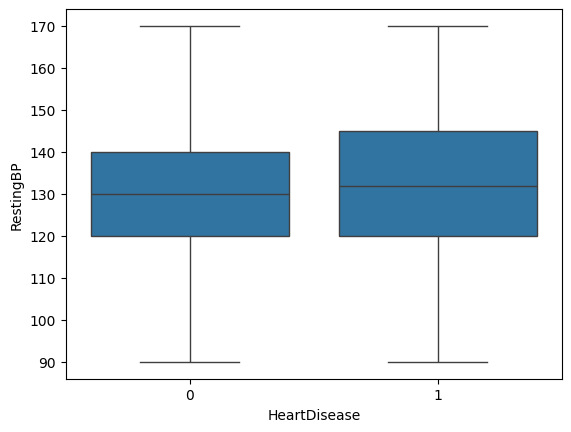

In [ ]:
sns.boxplot(data=df,x='HeartDisease',y='RestingBP')

In [ ]:
#observation
#resting bp is high in heart disease people

<Axes: xlabel='HeartDisease', ylabel='Cholesterol'>

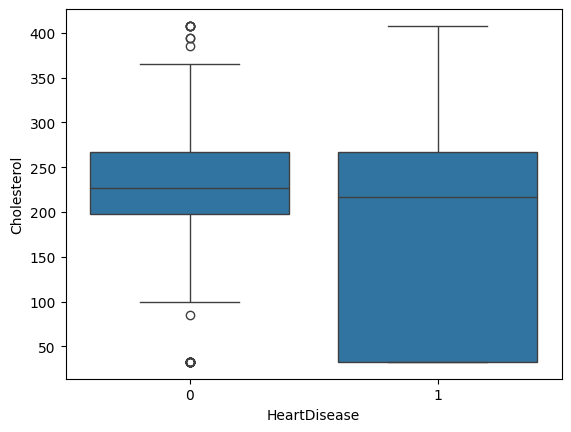

In [ ]:
sns.boxplot(data=df,x='HeartDisease',y='Cholesterol')

In [ ]:
#observations
# Heart patients have high cholesterol

<Axes: xlabel='FastingBS', ylabel='count'>

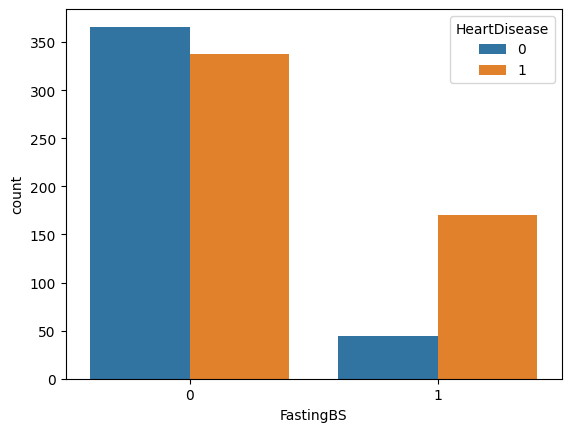

In [ ]:
sns.countplot(data=df,x='FastingBS',hue='HeartDisease')

In [ ]:
#observations
# fastbs is less in heart disease people

<Axes: xlabel='HeartDisease', ylabel='MaxHR'>

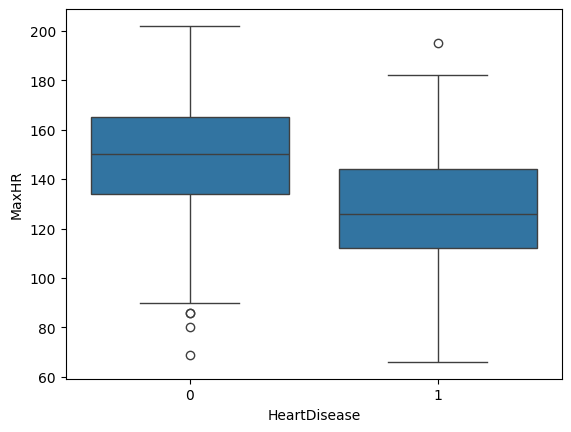

In [ ]:
sns.boxplot(data=df,x='HeartDisease',y='MaxHR')

In [ ]:
#observation
#max hr is less in heat patients and high in normal people

<Axes: xlabel='ExerciseAngina_Y', ylabel='count'>

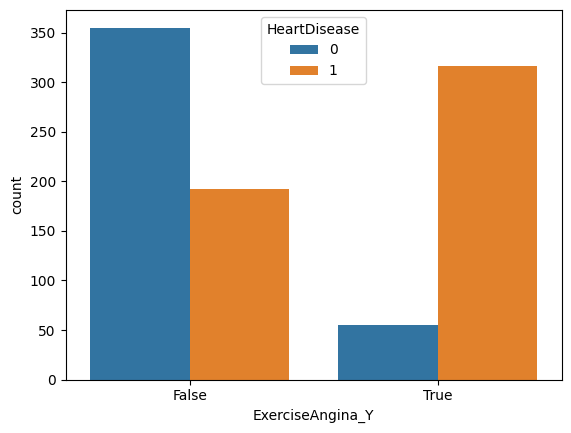

In [ ]:
sns.countplot(data=df,x='ExerciseAngina_Y',hue='HeartDisease')

In [ ]:
#Observations
# it is observed that high ecerciseangina has less effect of heart disease

<Axes: xlabel='HeartDisease', ylabel='Oldpeak'>

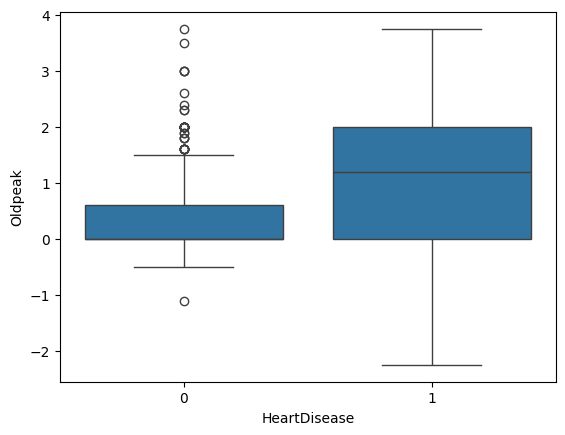

In [ ]:
sns.boxplot(data=df,x='HeartDisease',y='Oldpeak')

In [ ]:
#observations
#more old people have high heart disease

<Axes: xlabel='ST_Slope_Flat', ylabel='count'>

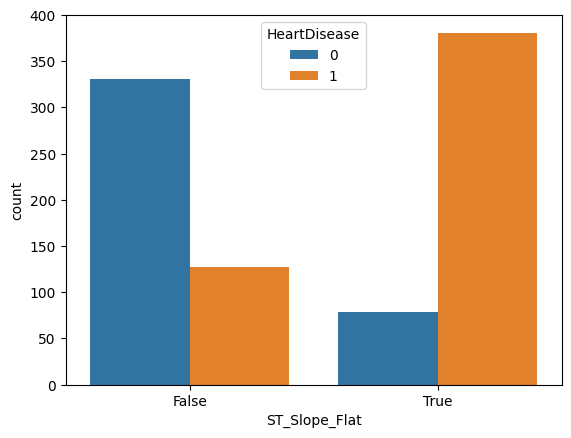

In [ ]:
sns.countplot(data=df,x='ST_Slope_Flat',hue='HeartDisease')

In [ ]:
#Observations
# it is observed that high st slope flat and up  has less effect of heart disease

### **8. Multivariate Analysis** — *[10 Marks]*
- Pairplot
- Interactions between 2+ variables
- Comments on how combinations impact heart disease

---


In [ ]:
plt.figure(figsize=(20,20))
sns.pairplot(df, hue='HeartDisease')

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
#Observations

#The scatter plots of age vs cholesterol and similar combinations show significant overlap between heart disease and non-heart disease groups.
#Chest Pain Type (cp) is a Strong Indicator
#Slope of ST Segment is highly predictive.
#Higher for heart disease patients, especially visible in  Higher oldpeak values increase the likelihood of heart disease.
#Resting Blood Pressure and Maximum Heart Rate Have Overlap that might help a little but are not strong standalone predictors.


### **9. Heatmap - Correlation Matrix** — *[10 Marks]*
- Correlation matrix
- Use `seaborn.heatmap()`
- Identify top correlations with target

---



 top correlations with target
HeartDisease         1.000000
ST_Slope_Flat        0.554134
ExerciseAngina_Y     0.494282
Oldpeak              0.410211
Sex_M                0.305445
Age                  0.282039
FastingBS            0.267291
RestingBP            0.113191
RestingECG_ST        0.102527
ChestPainType_TA    -0.054790
RestingECG_Normal   -0.091580
ChestPainType_NAP   -0.212964
Cholesterol         -0.225304
MaxHR               -0.400519
ChestPainType_ATA   -0.401924
ST_Slope_Up         -0.622164
Name: HeartDisease, dtype: float64


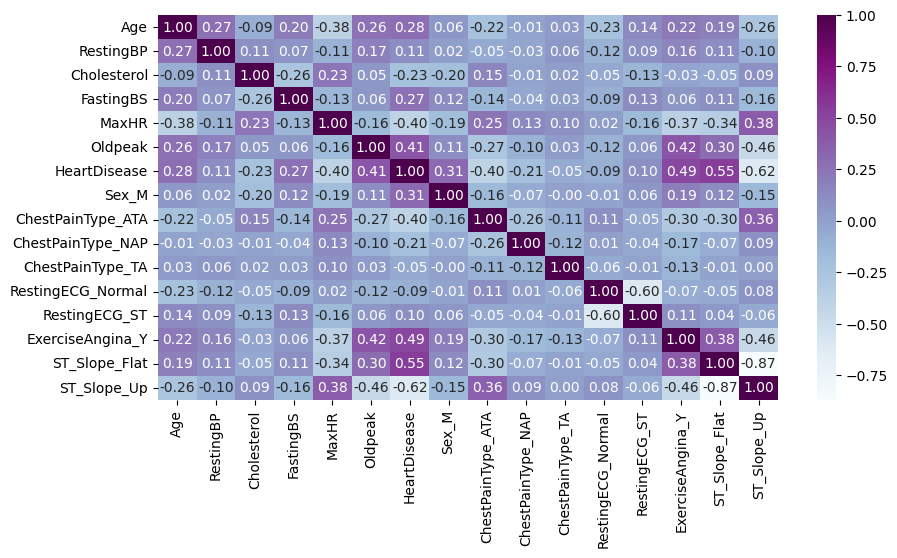

In [ ]:
df_encoded = pd.get_dummies(df, drop_first=True)
corr = df_encoded.corr()
plt.figure(figsize=(10,5))
df_encoded = pd.get_dummies(df, drop_first=True)
sns.heatmap(corr, cmap='BuPu', annot=True, fmt='.2f')
cor_target = corr['HeartDisease'].sort_values(ascending=False)
print('\n top correlations with target')
print(cor_target)


### **10. Model Building** — *[50 Marks]*
Build the following classification models:
- Logistic Regression
- Naive Bayes (choose appropriate types)
- K-Nearest Neighbors (KNN)
- Decision Tree
- Support Vector Machine (SVM)
- Random Forest
- Bagging Classifier
- Boosting Algorithms:
  - AdaBoost
  - Gradient Boosting (GBM)
  - XGBoost
- Stacking Ensemble
- Voting Classifier

---



In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier

In [ ]:
X = df.drop('HeartDisease', axis=1)  # Features
y = df['HeartDisease']  # Target variable

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
models = {
      "Logistic Regression": LogisticRegression(),
      "Naive Bayes (Gaussian)": GaussianNB(),
      "Naive Bayes (Bernoulli)": BernoulliNB(),
      "K-Nearest Neighbors": KNeighborsClassifier(),
      "Decision Tree": DecisionTreeClassifier(),
      "Support Vector Machine": SVC(),
      "Random Forest": RandomForestClassifier(),
      "Bagging Classifier": BaggingClassifier(),
      "AdaBoost": AdaBoostClassifier(),
      "Gradient Boosting": GradientBoostingClassifier(),
      "XGBoost": XGBClassifier(),
           }

In [ ]:
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy: {accuracy:.4f}")

Logistic Regression Accuracy: 0.8587
Naive Bayes (Gaussian) Accuracy: 0.8533
Naive Bayes (Bernoulli) Accuracy: 0.8207
K-Nearest Neighbors Accuracy: 0.8641
Decision Tree Accuracy: 0.8424
Support Vector Machine Accuracy: 0.8750
Random Forest Accuracy: 0.8641
Bagging Classifier Accuracy: 0.8478
AdaBoost Accuracy: 0.8587
Gradient Boosting Accuracy: 0.8750
XGBoost Accuracy: 0.8696


In [ ]:
voting_clf = VotingClassifier(estimators=[
      ('logreg', LogisticRegression()),
      ('rf', RandomForestClassifier()),
      ('knn', KNeighborsClassifier())
           ], voting='hard')

In [ ]:
voting_clf.fit(X_train_scaled, y_train)
y_pred_voting = voting_clf.predict(X_test_scaled)
accuracy_voting = accuracy_score(y_test, y_pred_voting)
print(f"Voting Classifier Accuracy: {accuracy_voting:.4f}")

Voting Classifier Accuracy: 0.8750


### **11. Model Evaluation** — *[20 Marks]*
- Accuracy, Precision, Recall, F1-Score
- Confusion Matrix
- ROC-AUC Curve (where applicable)

---


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, roc_auc_score, roc_curve


In [ ]:
logistic_model = LogisticRegression()
logistic_model.fit(X_train_scaled, y_train)

LogisticRegression()

In [ ]:
nb_gaussian_model = GaussianNB()
nb_gaussian_model.fit(X_train_scaled, y_train)

GaussianNB()

In [ ]:
nb_bernoulli_model = BernoulliNB()
nb_bernoulli_model.fit(X_train_scaled, y_train)

BernoulliNB()

In [ ]:
knn_model = KNeighborsClassifier()
knn_model.fit(X_train_scaled, y_train)

KNeighborsClassifier()

In [ ]:
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train_scaled, y_train)

DecisionTreeClassifier()

In [ ]:
svm_model = SVC(probability=True)
svm_model.fit(X_train_scaled, y_train)

SVC(probability=True)

In [ ]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train_scaled, y_train)

RandomForestClassifier()

In [ ]:
bagging_model = BaggingClassifier()
bagging_model.fit(X_train_scaled, y_train)

BaggingClassifier()

In [ ]:
adaboost_model = AdaBoostClassifier()
adaboost_model.fit(X_train_scaled, y_train)

AdaBoostClassifier()

In [ ]:
gbm_model = GradientBoostingClassifier()
gbm_model.fit(X_train_scaled, y_train)

GradientBoostingClassifier()

In [ ]:
xgboost_model = XGBClassifier()
xgboost_model.fit(X_train_scaled, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
voting_model = VotingClassifier(estimators=[
      ('logistic', logistic_model),
      ('svm', svm_model),
      ('rf', rf_model)
            ], voting='hard')
voting_model.fit(X_train_scaled, y_train)

VotingClassifier(estimators=[('logistic', LogisticRegression()),
                             ('svm', SVC(probability=True)),
                             ('rf', RandomForestClassifier())])

Evaluating Logistic Regression:
Accuracy: 0.8696
Precision: 0.9010
Recall: 0.8505
F1-Score: 0.8750
Confusion Matrix:
[[67 10]
 [16 91]]
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.87      0.84        77
           1       0.90      0.85      0.88       107

    accuracy                           0.86       184
   macro avg       0.85      0.86      0.86       184
weighted avg       0.86      0.86      0.86       184

ROC-AUC: 0.9272970020633572


Evaluating Naive Bayes (Gaussian):
Accuracy: 0.8696
Precision: 0.9082
Recall: 0.8318
F1-Score: 0.8683
Confusion Matrix:
[[68  9]
 [18 89]]
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.88      0.83        77
           1       0.91      0.83      0.87       107

    accuracy                           0.85       184
   macro avg       0.85      0.86      0.85       184
weighted avg       0.86      0.85      0.85       

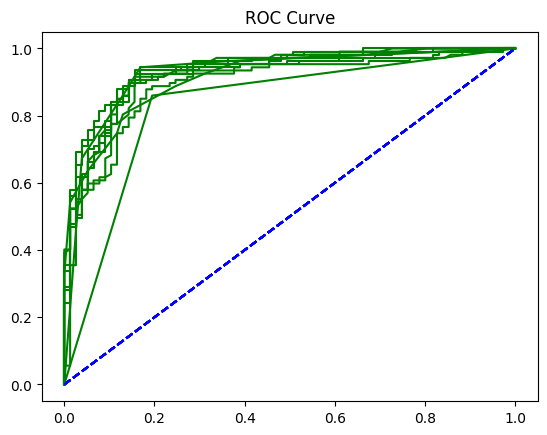

In [ ]:
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    ccuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    clf_report = classification_report(y_test, y_pred)
    if hasattr(model, 'predict_proba'):
        y_prob = model.predict_proba(X_test)[:, 1]
        roc_auc = roc_auc_score(y_test, y_prob)
        fpr, tpr, _ = roc_curve(y_test, y_prob)
        plt.plot(fpr, tpr, color='green', label='ROC Curve')
        plt.plot([0, 1], [0, 1], color='blue', linestyle='--')
        plt.title('ROC Curve')
    else:
        roc_auc = 'N/A'

    return accuracy, precision, recall, f1, cm, clf_report, roc_auc
models = {
    'Logistic Regression': logistic_model,
    'Naive Bayes (Gaussian)': nb_gaussian_model,
    'Naive Bayes (Bernoulli)': nb_bernoulli_model,
    'K-Nearest Neighbors': knn_model,
    'Decision Tree': dt_model,
    'Support Vector Machine': svm_model,
    'Random Forest': rf_model,
    'Bagging Classifier': bagging_model,
    'AdaBoost': adaboost_model,
    'Gradient Boosting': gbm_model,
    'XGBoost': xgboost_model,
    'Voting Classifier': voting_model
         }
for name, model in models.items():
      print(f"Evaluating {name}:")
      accuracy, precision, recall, f1, cm, clf_report, roc_auc = evaluate_model(model, X_test_scaled, y_test)

      print(f"Accuracy: {accuracy:.4f}")
      print(f"Precision: {precision:.4f}")
      print(f"Recall: {recall:.4f}")
      print(f"F1-Score: {f1:.4f}")
      print(f"Confusion Matrix:\n{cm}")
      print(f"Classification Report:\n{clf_report}")
      print(f"ROC-AUC: {roc_auc}")
      print("\n" + "="*50 + "\n")





### **12. Interpretation of Metrics** — *[10 Marks]*
- Explain what the evaluation metrics mean
- Discuss trade-offs (e.g., precision vs recall)

---



### **13. Final Conclusion** — *[10 Marks]*
- Summarize findings
- Which model performed best?
- Possible improvements

---

 **Total: 200 Marks**


Best performed model is
Gradient boost
random forest
knn
xg boost


Improvements include cross validation,feature engineering , ensemble methods